[[ 0.00e+00 -3.50e-12]
 [ 0.00e+00  3.88e-11]
 [ 0.00e+00  4.09e-11]
 [ 0.00e+00  5.00e-12]
 [ 0.00e+00  4.20e-11]
 [ 0.00e+00 -3.30e-11]
 [ 0.00e+00  4.10e-11]
 [ 0.00e+00  2.00e-12]
 [ 0.00e+00 -8.00e-12]
 [ 0.00e+00 -6.00e-12]
 [ 0.00e+00 -2.90e-11]
 [ 0.00e+00  2.40e-11]
 [ 0.00e+00  4.40e-11]
 [ 0.00e+00 -1.50e-11]
 [ 0.00e+00 -2.50e-11]
 [ 0.00e+00  4.10e-11]
 [ 0.00e+00 -4.76e-10]
 [ 0.00e+00 -4.13e-10]
 [ 0.00e+00  1.99e-10]
 [ 0.00e+00 -4.27e-10]
 [ 0.00e+00 -1.20e-11]
 [ 0.00e+00 -2.07e-10]
 [ 0.00e+00 -4.13e-10]
 [ 0.00e+00  1.26e-10]
 [ 0.00e+00  1.25e-10]
 [ 0.00e+00 -2.56e-10]
 [ 0.00e+00  1.04e-10]
 [ 0.00e+00  4.50e-10]
 [ 0.00e+00  3.33e-10]
 [ 0.00e+00 -7.80e-11]
 [ 0.00e+00  4.58e-10]
 [ 0.00e+00  6.40e-11]
 [ 0.00e+00 -1.34e-10]
 [ 0.00e+00 -2.35e-10]
 [ 0.00e+00 -4.50e-10]
 [ 0.00e+00  1.00e-10]
 [ 0.00e+00 -4.90e-10]
 [ 0.00e+00  3.60e-10]
 [ 0.00e+00  5.00e-10]
 [ 0.00e+00 -1.90e-10]
 [ 0.00e+00  4.30e-10]
 [ 0.00e+00 -3.40e-10]
 [ 0.00e+00 -4.70e-10]
 [ 0.00e+00

c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
c:\users\drich\pycharmprojects\reconstruction\venv\lib\site-packages\ipykernel_launcher.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a n

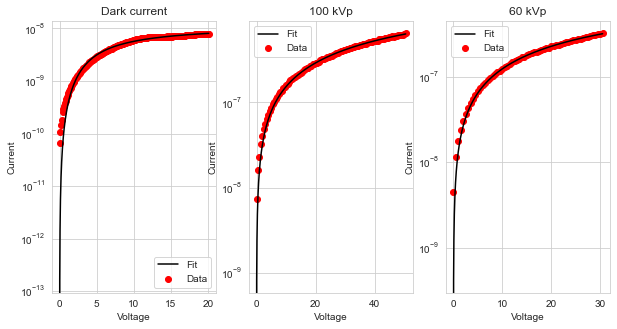

In [71]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv file
directory = r'D:\OneDrive - University of Victoria\Research\resolution\mu-tau product'
filename = 'IV_curves.csv'

filename = os.path.join(directory, filename)

# Read the data in
data = []
with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

# Cut out column headings
data = np.array(data[2:])

# Organize the 3 groups of 2 column sets
dark = data[:, 0:2]
v100 = data[:, 2:4]
v60 = data[:, 4:]

# Get rid of '--' empty cells
num_rows = len(dark)
row = 0
while row < num_rows and dark[row][0] != '--':
    row += 1
dark = np.array(dark[0:row], dtype='float')

row = 0
while row < num_rows and v100[row][0] != '--':
    row += 1
v100 = np.array(v100[0:row], dtype='float')

row = 0
while row < num_rows and v60[row][0] != '--':
    row += 1
v60 = np.array(v60[0:row], dtype='float')

# Fit and plot the data
from scipy.optimize import curve_fit
import seaborn as sns

# Go from 0 to highest voltage
# dark[0:int(len(dark)/2)-1, 1] = dark[0:int(len(dark)/2)-1, 1]*-1
# v100[0:int(len(v100)/2)-1, 1] = v100[0:int(len(v100)/2)-1, 1]*-1
# v60[0:int(len(v60)/2)-1, 1] = v60[0:int(len(v60)/2)-1, 1]*-1
# print(v60)
dark = dark[int(len(dark)/2)-1:]
v100 = v100[int(len(v100)/2)-1:]
v60 = v60[int(len(v60)/2)-1:]
v601 = np.load(r'D:\OneDrive - University of Victoria\Research\resolution\mu-tau product\kv60.npy')

print(v60 - v601)

def herck(v, i0, mu, tau, s):
    l = 0.008
    return (i0*mu*tau*v)/l**2 * ((1 - np.exp(-(l**2/(mu*tau*v))))/(1 + (l/v) * (s/mu)))


# Fits for the applied voltages
v_dark_fit = np.linspace(dark[0][0], dark[-1][0], 1000)
v100_fit = np.linspace(v100[0][0], v100[-1][0], 1000)
v60_fit = np.linspace(v60[0][0], v60[-1][0], 1000)

# guess = [1, 1, 1, 1]
guess = [2.8e-6, 5, 1, 1]

pdark, pdark_cov = curve_fit(herck, dark[:, 0], dark[:, 1], p0=[1, 1, 1, 1])
p100, p100_cov = curve_fit(herck, v100[:, 0], v100[:, 1], p0=guess)
p60, p60_cov = curve_fit(herck, v60[:, 0], v60[:, 1], p0=guess)

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].scatter(dark[:, 0], dark[:, 1], color='r')
ax[0].semilogy(v_dark_fit, herck(v_dark_fit, *pdark), color='k')
ax[0].set_title('Dark current')
ax[0].set_ylabel('Current')
ax[0].set_xlabel('Voltage')
ax[0].legend(['Fit', 'Data'])

ax[1].scatter(v100[:, 0], v100[:, 1], color='r')
ax[1].semilogy(v100_fit, herck(v100_fit, *p100), color='k')
ax[1].set_title('100 kVp')
ax[1].set_ylabel('Current')
ax[1].set_xlabel('Voltage')
ax[1].legend(['Fit', 'Data'])

ax[2].scatter(v60[:, 0], v60[:, 1], color='r')
ax[2].semilogy(v60_fit, herck(v60_fit, *p60), color='k')
ax[2].set_title('60 kVp')
ax[2].set_ylabel('Current')
ax[2].set_xlabel('Voltage')
ax[2].legend(['Fit', 'Data'])

print(pdark)
print(p100)
print(p60)
print()

print(pdark[1] * pdark[2])
print(p100[1] * p100[2])
print(p60[1] * p60[2])

fig.show()